In [10]:
# This script is for DNN, all variables
# Take Dataset3 NYC for example

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch

# from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [19]:
X_complete_test_passed_1 = pd.read_csv("../Data/01 Processed Dataset/Complete_NYC.csv") #input
X_complete_test_passed = X_complete_test_passed_1.set_index('GEOID')
y = X_complete_test_passed.pop('obesity_cr')

In [20]:
# new code
# all predictors

y_dnn_complete_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

avg_r_squared = 0

def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

for train_index, test_index in ten_fold.split(X_complete_test_passed):
    print("TEST:", test_index)

    X_train, X_test = X_complete_test_passed.iloc[train_index], X_complete_test_passed.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #scaler = StandardScaler()
    
    #scaled_X_train = scaler.fit_transform(X_train)
    #scaled_X_test = scaler.transform(X_test)
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)
    
    tf.random.set_seed(42)
    dnn_model = keras.models.Sequential([
        keras.layers.Dense(176,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(208,activation="relu"),
        keras.layers.Dense(64,activation="relu"),
        keras.layers.Dense(208,activation="relu"),
        keras.layers.Dense(208,activation="relu"),
        keras.layers.Dense(1)
    ])
    
    early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
    dnn_model.compile(optimizer="adam", loss=keras.losses.mean_absolute_error, metrics=[keras.metrics.mean_squared_error])
    dnn_model.fit(x=scaled_X_train, y=y_train, validation_split=0.1, epochs=50, callbacks=[early_stop],   verbose=2) 
    
    
    this_y_predict = dnn_model.predict(scaled_X_test).flatten()

    y_dnn_complete_predict = y_dnn_complete_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [  29   49   56   65   69   70   99  109  111  120  124  128  135  211
  212  231  233  237  239  251  254  256  270  281  298  305  306  307
  316  324  342  344  350  353  361  366  367  368  382  383  394  411
  414  416  420  422  427  429  433  450  464  480  483  485  486  514
  526  527  530  532  548  552  554  561  570  581  582  583  602  614
  617  630  679  741  743  752  756  759  785  798  819  824  843  849
  881  889  892  903  915  921  926  930  932  940  949  950  988  999
 1001 1009 1052 1087 1106 1113 1116 1118 1125 1137 1160 1169 1176 1177
 1182 1216 1221 1234 1235 1242 1244 1252 1255 1268 1270 1273 1274 1284
 1285 1287 1298 1303 1305 1316 1318 1322 1341 1343 1344 1357 1359 1379
 1384 1386 1412 1428 1429 1444 1448 1469 1476 1490 1497 1506 1531 1532
 1563 1573 1593 1594 1600 1604 1616 1619 1647 1659 1668 1671 1673 1675
 1681 1684 1686 1716 1720 1726 1732 1736 1740 1758 1764 1770 1784 1810
 1813 1814 1820 1855 1856 1867 1907 1918 1926 1934 1935 1936 1940 1952


Epoch 1/50
51/51 - 1s - loss: 10.8232 - mean_squared_error: 204.2906 - val_loss: 4.2566 - val_mean_squared_error: 30.7472 - 569ms/epoch - 11ms/step
Epoch 2/50
51/51 - 0s - loss: 4.0900 - mean_squared_error: 32.2184 - val_loss: 3.9883 - val_mean_squared_error: 25.2491 - 78ms/epoch - 2ms/step
Epoch 3/50
51/51 - 0s - loss: 3.5076 - mean_squared_error: 21.9802 - val_loss: 3.4826 - val_mean_squared_error: 16.8288 - 99ms/epoch - 2ms/step
Epoch 4/50
51/51 - 0s - loss: 3.0625 - mean_squared_error: 17.0091 - val_loss: 2.8959 - val_mean_squared_error: 12.7905 - 69ms/epoch - 1ms/step
Epoch 5/50
51/51 - 0s - loss: 2.7142 - mean_squared_error: 13.2681 - val_loss: 2.0626 - val_mean_squared_error: 6.9229 - 83ms/epoch - 2ms/step
Epoch 6/50
51/51 - 0s - loss: 2.5489 - mean_squared_error: 11.1047 - val_loss: 2.9552 - val_mean_squared_error: 12.2425 - 67ms/epoch - 1ms/step
Epoch 7/50
51/51 - 0s - loss: 2.2279 - mean_squared_error: 8.5455 - val_loss: 2.7971 - val_mean_squared_error: 10.7629 - 68ms/epoch -

51/51 - 0s - loss: 1.3858 - mean_squared_error: 3.2903 - val_loss: 1.3611 - val_mean_squared_error: 3.0140 - 84ms/epoch - 2ms/step
Epoch 19/50
51/51 - 0s - loss: 1.4316 - mean_squared_error: 3.4785 - val_loss: 1.9312 - val_mean_squared_error: 5.4125 - 84ms/epoch - 2ms/step
Epoch 20/50
51/51 - 0s - loss: 1.4517 - mean_squared_error: 3.5722 - val_loss: 1.5426 - val_mean_squared_error: 3.8073 - 100ms/epoch - 2ms/step
Epoch 21/50
51/51 - 0s - loss: 1.3185 - mean_squared_error: 3.0011 - val_loss: 1.5105 - val_mean_squared_error: 3.5521 - 100ms/epoch - 2ms/step
Epoch 22/50
51/51 - 0s - loss: 1.2827 - mean_squared_error: 2.8465 - val_loss: 1.7071 - val_mean_squared_error: 4.3539 - 86ms/epoch - 2ms/step
Epoch 23/50
51/51 - 0s - loss: 1.3165 - mean_squared_error: 2.9406 - val_loss: 1.7920 - val_mean_squared_error: 4.7348 - 83ms/epoch - 2ms/step
Epoch 24/50
51/51 - 0s - loss: 1.2487 - mean_squared_error: 2.7526 - val_loss: 1.4872 - val_mean_squared_error: 3.7943 - 83ms/epoch - 2ms/step
Epoch 25/

Epoch 27/50
51/51 - 0s - loss: 1.3838 - mean_squared_error: 3.2327 - val_loss: 1.9529 - val_mean_squared_error: 6.2561 - 100ms/epoch - 2ms/step
Epoch 28/50
51/51 - 0s - loss: 1.2914 - mean_squared_error: 2.8506 - val_loss: 1.4538 - val_mean_squared_error: 3.5912 - 78ms/epoch - 2ms/step
Epoch 29/50
51/51 - 0s - loss: 1.2202 - mean_squared_error: 2.5442 - val_loss: 1.6429 - val_mean_squared_error: 4.1089 - 84ms/epoch - 2ms/step
Epoch 30/50
51/51 - 0s - loss: 1.1689 - mean_squared_error: 2.3385 - val_loss: 1.5822 - val_mean_squared_error: 4.2640 - 100ms/epoch - 2ms/step
Epoch 31/50
51/51 - 0s - loss: 1.2059 - mean_squared_error: 2.6095 - val_loss: 1.4104 - val_mean_squared_error: 3.1411 - 83ms/epoch - 2ms/step
Epoch 32/50
51/51 - 0s - loss: 1.2305 - mean_squared_error: 2.6056 - val_loss: 1.4112 - val_mean_squared_error: 3.1924 - 64ms/epoch - 1ms/step
Epoch 33/50
51/51 - 0s - loss: 1.2105 - mean_squared_error: 2.5420 - val_loss: 1.7277 - val_mean_squared_error: 4.7073 - 89ms/epoch - 2ms/st

51/51 - 0s - loss: 1.1821 - mean_squared_error: 2.4128 - val_loss: 1.5409 - val_mean_squared_error: 3.4653 - 83ms/epoch - 2ms/step
Epoch 45/50
51/51 - 0s - loss: 1.0509 - mean_squared_error: 1.9271 - val_loss: 1.6428 - val_mean_squared_error: 4.1744 - 83ms/epoch - 2ms/step
Epoch 46/50
51/51 - 0s - loss: 1.0361 - mean_squared_error: 1.9589 - val_loss: 1.6562 - val_mean_squared_error: 4.0806 - 84ms/epoch - 2ms/step
Epoch 47/50
51/51 - 0s - loss: 1.0554 - mean_squared_error: 1.9827 - val_loss: 1.7695 - val_mean_squared_error: 4.4474 - 92ms/epoch - 2ms/step
Epoch 48/50
51/51 - 0s - loss: 0.9864 - mean_squared_error: 1.7443 - val_loss: 1.5216 - val_mean_squared_error: 3.5397 - 90ms/epoch - 2ms/step
Epoch 49/50
51/51 - 0s - loss: 1.0212 - mean_squared_error: 1.8669 - val_loss: 1.2231 - val_mean_squared_error: 2.2599 - 83ms/epoch - 2ms/step
Epoch 50/50
51/51 - 0s - loss: 0.9729 - mean_squared_error: 1.6834 - val_loss: 1.4143 - val_mean_squared_error: 3.0479 - 86ms/epoch - 2ms/step
TEST: [   0

Epoch 45/50
51/51 - 0s - loss: 1.0467 - mean_squared_error: 1.9715 - val_loss: 1.4885 - val_mean_squared_error: 3.4624 - 85ms/epoch - 2ms/step
Epoch 46/50
51/51 - 0s - loss: 1.0076 - mean_squared_error: 1.8155 - val_loss: 1.3621 - val_mean_squared_error: 2.9040 - 88ms/epoch - 2ms/step
Epoch 47/50
51/51 - 0s - loss: 1.0135 - mean_squared_error: 1.8739 - val_loss: 1.2395 - val_mean_squared_error: 2.3948 - 86ms/epoch - 2ms/step
Epoch 48/50
51/51 - 0s - loss: 0.9828 - mean_squared_error: 1.7328 - val_loss: 1.4218 - val_mean_squared_error: 3.0602 - 87ms/epoch - 2ms/step
Epoch 49/50
51/51 - 0s - loss: 0.9720 - mean_squared_error: 1.6505 - val_loss: 1.5754 - val_mean_squared_error: 3.8328 - 81ms/epoch - 2ms/step
Epoch 50/50
51/51 - 0s - loss: 1.0710 - mean_squared_error: 1.9989 - val_loss: 1.4065 - val_mean_squared_error: 3.0546 - 75ms/epoch - 1ms/step
TEST: [   9   11   28   36   38   57   61   75   79   89   90  108  114  133
  145  169  172  176  191  223  234  255  264  278  284  338  347

51/51 - 0s - loss: 0.9913 - mean_squared_error: 1.7764 - val_loss: 1.3036 - val_mean_squared_error: 2.7541 - 107ms/epoch - 2ms/step
TEST: [   4   16   17   19   22   35   46   50   93  116  119  127  149  153
  154  157  159  180  190  217  245  257  263  268  283  301  304  313
  320  335  340  356  369  399  407  431  443  470  473  476  487  489
  496  511  512  515  517  521  537  546  559  569  574  580  606  625
  633  635  653  655  656  658  684  685  689  690  696  703  726  740
  758  761  768  773  784  789  790  797  801  822  827  830  833  837
  851  853  866  876  895  902  911  920  927  935  959  961  971  980
  991  992  996 1002 1003 1008 1011 1015 1019 1039 1062 1066 1069 1070
 1072 1077 1081 1092 1099 1115 1119 1127 1139 1141 1148 1150 1166 1191
 1195 1199 1203 1212 1213 1219 1227 1243 1246 1260 1277 1279 1295 1308
 1311 1312 1346 1348 1365 1373 1377 1416 1473 1504 1535 1539 1540 1547
 1552 1556 1564 1580 1591 1620 1626 1651 1656 1657 1660 1677 1690 1702
 1703 1704

Epoch 11/50
51/51 - 0s - loss: 1.7658 - mean_squared_error: 5.1016 - val_loss: 1.5575 - val_mean_squared_error: 4.0643 - 92ms/epoch - 2ms/step
Epoch 12/50
51/51 - 0s - loss: 1.7435 - mean_squared_error: 5.2536 - val_loss: 2.2470 - val_mean_squared_error: 6.9190 - 90ms/epoch - 2ms/step
Epoch 13/50
51/51 - 0s - loss: 1.6317 - mean_squared_error: 4.5047 - val_loss: 2.0153 - val_mean_squared_error: 5.7036 - 81ms/epoch - 2ms/step
Epoch 14/50
51/51 - 0s - loss: 1.6483 - mean_squared_error: 4.6106 - val_loss: 1.9999 - val_mean_squared_error: 5.8742 - 82ms/epoch - 2ms/step
Epoch 15/50
51/51 - 0s - loss: 1.4963 - mean_squared_error: 3.8616 - val_loss: 2.3748 - val_mean_squared_error: 7.8919 - 82ms/epoch - 2ms/step
Epoch 16/50
51/51 - 0s - loss: 1.5150 - mean_squared_error: 3.9245 - val_loss: 2.0287 - val_mean_squared_error: 5.9873 - 93ms/epoch - 2ms/step
Epoch 17/50
51/51 - 0s - loss: 1.4868 - mean_squared_error: 3.7397 - val_loss: 1.4102 - val_mean_squared_error: 3.2133 - 89ms/epoch - 2ms/step

51/51 - 0s - loss: 1.3811 - mean_squared_error: 3.2994 - val_loss: 1.6620 - val_mean_squared_error: 4.0745 - 87ms/epoch - 2ms/step
Epoch 23/50
51/51 - 0s - loss: 1.3079 - mean_squared_error: 2.9522 - val_loss: 1.4657 - val_mean_squared_error: 3.3568 - 81ms/epoch - 2ms/step
Epoch 24/50
51/51 - 0s - loss: 1.2843 - mean_squared_error: 2.8299 - val_loss: 1.7863 - val_mean_squared_error: 4.5188 - 84ms/epoch - 2ms/step
Epoch 25/50
51/51 - 0s - loss: 1.2541 - mean_squared_error: 2.7296 - val_loss: 1.3967 - val_mean_squared_error: 2.9389 - 96ms/epoch - 2ms/step


In [7]:
# all predictors

y_dnn_complete_predict = []
y_true = []

ten_fold = KFold(n_splits=10, shuffle=True, random_state=42)

avg_r_squared = 0

def standarize_data(data, stats):
    return (data - stats['mean'])/ stats['std']

for train_index, test_index in ten_fold.split(X_complete_test_passed):
    print("TEST:", test_index)

    X_train, X_test = X_complete_test_passed.iloc[train_index], X_complete_test_passed.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #scaler = StandardScaler()
    
    #scaled_X_train = scaler.fit_transform(X_train)
    #scaled_X_test = scaler.transform(X_test)
    
    training_stat = X_train.describe().transpose()
    scaled_X_train = standarize_data(X_train, training_stat)
    scaled_X_test = standarize_data(X_test, training_stat)

    tf.random.set_seed(42)
    
    dnn_model = keras.models.Sequential([
        keras.layers.Dense(160,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(208,activation="relu"),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(160,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(160,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(256,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(32,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(240,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(96,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(208,activation="relu"),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(1)
    ])
    
    #early_stop = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    dnn_model.compile(optimizer="adam", loss=keras.losses.mean_squared_error, metrics=[keras.metrics.mean_squared_error])
    dnn_model.fit(x=scaled_X_train, y=y_train, epochs=50,   verbose=2) #callbacks=[early_stop],
    
    
    this_y_predict = dnn_model.predict(scaled_X_test).flatten()

    y_dnn_complete_predict = y_dnn_complete_predict + this_y_predict.tolist()
    y_true = y_true + y_test.tolist()
    
    avg_r_squared += r2_score(y_test, this_y_predict)

TEST: [  29   49   56   65   69   70   99  109  111  120  124  128  135  211
  212  231  233  237  239  251  254  256  270  281  298  305  306  307
  316  324  342  344  350  353  361  366  367  368  382  383  394  411
  414  416  420  422  427  429  433  450  464  480  483  485  486  514
  526  527  530  532  548  552  554  561  570  581  582  583  602  614
  617  630  679  741  743  752  756  759  785  798  819  824  843  849
  881  889  892  903  915  921  926  930  932  940  949  950  988  999
 1001 1009 1052 1087 1106 1113 1116 1118 1125 1137 1160 1169 1176 1177
 1182 1216 1221 1234 1235 1242 1244 1252 1255 1268 1270 1273 1274 1284
 1285 1287 1298 1303 1305 1316 1318 1322 1341 1343 1344 1357 1359 1379
 1384 1386 1412 1428 1429 1444 1448 1469 1476 1490 1497 1506 1531 1532
 1563 1573 1593 1594 1600 1604 1616 1619 1647 1659 1668 1671 1673 1675
 1681 1684 1686 1716 1720 1726 1732 1736 1740 1758 1764 1770 1784 1810
 1813 1814 1820 1855 1856 1867 1907 1918 1926 1934 1935 1936 1940 1952


Epoch 18/50
57/57 - 0s - loss: 3.1168 - mean_squared_error: 3.1168 - 128ms/epoch - 2ms/step
Epoch 19/50
57/57 - 0s - loss: 2.6300 - mean_squared_error: 2.6300 - 126ms/epoch - 2ms/step
Epoch 20/50
57/57 - 0s - loss: 2.3813 - mean_squared_error: 2.3813 - 104ms/epoch - 2ms/step
Epoch 21/50
57/57 - 0s - loss: 2.5107 - mean_squared_error: 2.5107 - 115ms/epoch - 2ms/step
Epoch 22/50
57/57 - 0s - loss: 2.2449 - mean_squared_error: 2.2449 - 117ms/epoch - 2ms/step
Epoch 23/50
57/57 - 0s - loss: 2.3452 - mean_squared_error: 2.3452 - 109ms/epoch - 2ms/step
Epoch 24/50
57/57 - 0s - loss: 2.6313 - mean_squared_error: 2.6313 - 100ms/epoch - 2ms/step
Epoch 25/50
57/57 - 0s - loss: 2.0932 - mean_squared_error: 2.0932 - 100ms/epoch - 2ms/step
Epoch 26/50
57/57 - 0s - loss: 2.0314 - mean_squared_error: 2.0314 - 100ms/epoch - 2ms/step
Epoch 27/50
57/57 - 0s - loss: 1.9028 - mean_squared_error: 1.9028 - 118ms/epoch - 2ms/step
Epoch 28/50
57/57 - 0s - loss: 1.9475 - mean_squared_error: 1.9475 - 122ms/epoch

Epoch 46/50
57/57 - 0s - loss: 1.0589 - mean_squared_error: 1.0589 - 100ms/epoch - 2ms/step
Epoch 47/50
57/57 - 0s - loss: 1.1153 - mean_squared_error: 1.1153 - 116ms/epoch - 2ms/step
Epoch 48/50
57/57 - 0s - loss: 1.4291 - mean_squared_error: 1.4291 - 100ms/epoch - 2ms/step
Epoch 49/50
57/57 - 0s - loss: 1.0629 - mean_squared_error: 1.0629 - 116ms/epoch - 2ms/step
Epoch 50/50
57/57 - 0s - loss: 1.1136 - mean_squared_error: 1.1136 - 113ms/epoch - 2ms/step
TEST: [   6   18   31   48   54   58   81   83   84   86  105  113  118  126
  147  155  174  177  179  181  208  214  221  236  243  277  285  286
  287  296  308  312  326  327  329  341  346  358  360  363  370  377
  380  423  428  430  435  442  451  457  461  468  490  493  500  505
  513  522  528  551  560  566  589  598  601  609  621  629  631  637
  643  660  669  670  677  694  700  701  721  722  746  755  764  771
  781  802  807  809  862  869  873  874  886  900  906  916  923  943
  952  968  974  978  994 1005 1006 1

Epoch 13/50
57/57 - 0s - loss: 3.2632 - mean_squared_error: 3.2632 - 92ms/epoch - 2ms/step
Epoch 14/50
57/57 - 0s - loss: 3.1410 - mean_squared_error: 3.1410 - 100ms/epoch - 2ms/step
Epoch 15/50
57/57 - 0s - loss: 3.0069 - mean_squared_error: 3.0069 - 100ms/epoch - 2ms/step
Epoch 16/50
57/57 - 0s - loss: 2.7137 - mean_squared_error: 2.7137 - 100ms/epoch - 2ms/step
Epoch 17/50
57/57 - 0s - loss: 2.6492 - mean_squared_error: 2.6492 - 100ms/epoch - 2ms/step
Epoch 18/50
57/57 - 0s - loss: 2.9228 - mean_squared_error: 2.9228 - 115ms/epoch - 2ms/step
Epoch 19/50
57/57 - 0s - loss: 2.2003 - mean_squared_error: 2.2003 - 100ms/epoch - 2ms/step
Epoch 20/50
57/57 - 0s - loss: 2.2440 - mean_squared_error: 2.2440 - 118ms/epoch - 2ms/step
Epoch 21/50
57/57 - 0s - loss: 2.3011 - mean_squared_error: 2.3011 - 103ms/epoch - 2ms/step
Epoch 22/50
57/57 - 0s - loss: 2.3362 - mean_squared_error: 2.3362 - 101ms/epoch - 2ms/step
Epoch 23/50
57/57 - 0s - loss: 2.2633 - mean_squared_error: 2.2633 - 100ms/epoch 

57/57 - 0s - loss: 1.2682 - mean_squared_error: 1.2682 - 102ms/epoch - 2ms/step
Epoch 42/50
57/57 - 0s - loss: 1.3497 - mean_squared_error: 1.3497 - 98ms/epoch - 2ms/step
Epoch 43/50
57/57 - 0s - loss: 1.4428 - mean_squared_error: 1.4428 - 113ms/epoch - 2ms/step
Epoch 44/50
57/57 - 0s - loss: 1.4470 - mean_squared_error: 1.4470 - 100ms/epoch - 2ms/step
Epoch 45/50
57/57 - 0s - loss: 1.2892 - mean_squared_error: 1.2892 - 116ms/epoch - 2ms/step
Epoch 46/50
57/57 - 0s - loss: 1.2595 - mean_squared_error: 1.2595 - 100ms/epoch - 2ms/step
Epoch 47/50
57/57 - 0s - loss: 1.1157 - mean_squared_error: 1.1157 - 116ms/epoch - 2ms/step
Epoch 48/50
57/57 - 0s - loss: 1.3017 - mean_squared_error: 1.3017 - 90ms/epoch - 2ms/step
Epoch 49/50
57/57 - 0s - loss: 1.5280 - mean_squared_error: 1.5280 - 98ms/epoch - 2ms/step
Epoch 50/50
57/57 - 0s - loss: 1.4481 - mean_squared_error: 1.4481 - 99ms/epoch - 2ms/step
TEST: [   9   11   28   36   38   57   61   75   79   89   90  108  114  133
  145  169  172  17

57/57 - 0s - loss: 5.0246 - mean_squared_error: 5.0246 - 116ms/epoch - 2ms/step
Epoch 9/50
57/57 - 0s - loss: 5.7129 - mean_squared_error: 5.7129 - 113ms/epoch - 2ms/step
Epoch 10/50
57/57 - 0s - loss: 4.0499 - mean_squared_error: 4.0499 - 116ms/epoch - 2ms/step
Epoch 11/50
57/57 - 0s - loss: 3.5680 - mean_squared_error: 3.5680 - 116ms/epoch - 2ms/step
Epoch 12/50
57/57 - 0s - loss: 3.5275 - mean_squared_error: 3.5275 - 121ms/epoch - 2ms/step
Epoch 13/50
57/57 - 0s - loss: 3.0816 - mean_squared_error: 3.0816 - 101ms/epoch - 2ms/step
Epoch 14/50
57/57 - 0s - loss: 3.1675 - mean_squared_error: 3.1675 - 116ms/epoch - 2ms/step
Epoch 15/50
57/57 - 0s - loss: 3.0597 - mean_squared_error: 3.0597 - 107ms/epoch - 2ms/step
Epoch 16/50
57/57 - 0s - loss: 2.8381 - mean_squared_error: 2.8381 - 110ms/epoch - 2ms/step
Epoch 17/50
57/57 - 0s - loss: 2.6840 - mean_squared_error: 2.6840 - 100ms/epoch - 2ms/step
Epoch 18/50
57/57 - 0s - loss: 2.6190 - mean_squared_error: 2.6190 - 115ms/epoch - 2ms/step
E

Epoch 37/50
57/57 - 0s - loss: 1.7178 - mean_squared_error: 1.7178 - 115ms/epoch - 2ms/step
Epoch 38/50
57/57 - 0s - loss: 1.5472 - mean_squared_error: 1.5472 - 122ms/epoch - 2ms/step
Epoch 39/50
57/57 - 0s - loss: 1.4159 - mean_squared_error: 1.4159 - 116ms/epoch - 2ms/step
Epoch 40/50
57/57 - 0s - loss: 1.3354 - mean_squared_error: 1.3354 - 111ms/epoch - 2ms/step
Epoch 41/50
57/57 - 0s - loss: 1.5241 - mean_squared_error: 1.5241 - 126ms/epoch - 2ms/step
Epoch 42/50
57/57 - 0s - loss: 1.3456 - mean_squared_error: 1.3456 - 121ms/epoch - 2ms/step
Epoch 43/50
57/57 - 0s - loss: 1.3789 - mean_squared_error: 1.3789 - 113ms/epoch - 2ms/step
Epoch 44/50
57/57 - 0s - loss: 1.3178 - mean_squared_error: 1.3178 - 123ms/epoch - 2ms/step
Epoch 45/50
57/57 - 0s - loss: 1.3130 - mean_squared_error: 1.3130 - 139ms/epoch - 2ms/step
Epoch 46/50
57/57 - 0s - loss: 1.4237 - mean_squared_error: 1.4237 - 128ms/epoch - 2ms/step
Epoch 47/50
57/57 - 0s - loss: 1.1831 - mean_squared_error: 1.1831 - 119ms/epoch

In [4]:
dnn_complete_rmse = mean_squared_error(y_true , y_dnn_complete_predict, squared=False)
dnn_complete_r2 = r2_score(y_true, y_dnn_complete_predict)
avg_r_squared = avg_r_squared/10

In [5]:
# all - 10 epochs
print("RMSE of the DNN model adding alcohol visit predictors: "+str(dnn_complete_rmse))
print("R2 of the DNN model adding alcohol visit predictors: "+str(dnn_complete_r2)) # For R2, I choose this one
print("R2 of the DNN model adding alcohol visit predictors (avg): "+str(avg_r_squared))

RMSE of the DNN model adding alcohol visit predictors: 2.4351240859906866
R2 of the DNN model adding alcohol visit predictors: 0.8288055770572662
R2 of the DNN model adding alcohol visit predictors (avg): 0.8266498983400761


In [21]:
# Yingjie Run
dnn_complete_rmse = mean_squared_error(y_true , y_dnn_complete_predict, squared=False)
dnn_complete_r2 = r2_score(y_true, y_dnn_complete_predict)
avg_r_squared = avg_r_squared/10

In [22]:
# all - 10 epochs
print("RMSE of the DNN model adding alcohol visit predictors: "+str(dnn_complete_rmse))
print("R2 of the DNN model adding alcohol visit predictors: "+str(dnn_complete_r2)) # For R2, I choose this one
print("R2 of the DNN model adding alcohol visit predictors (avg): "+str(avg_r_squared))

RMSE of the DNN model adding alcohol visit predictors: 1.906785616647429
R2 of the DNN model adding alcohol visit predictors: 0.8950333941530025
R2 of the DNN model adding alcohol visit predictors (avg): 0.8935091082804787


In [16]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

11.0
43.4
12.830638885498047
40.64329528808594


<Figure size 720x576 with 0 Axes>

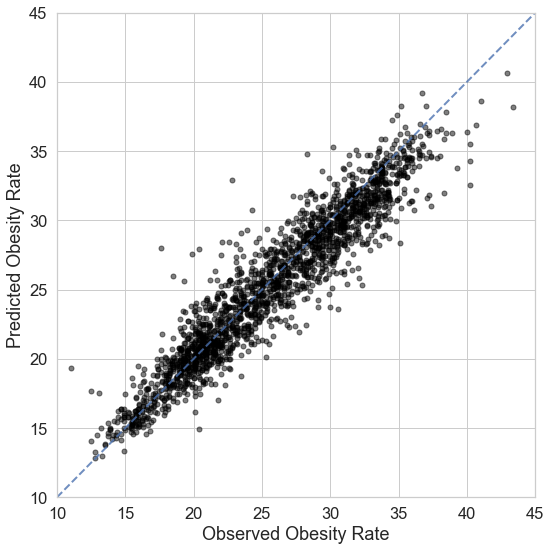

In [17]:
# Scatter-curve plot
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 28}

matplotlib.rc('font', **font)

plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid",font_scale = 1.5)

def prediction_scatter(true_label, prediction, lims, title):
    plt.figure(figsize=(8,8))
    scatter = plt.plot(true_label, prediction, "o", markersize=5, alpha=0.5, color="black")
    line = plt.plot(lims, lims, "b--",alpha=0.8, linewidth=2)
    plt.xlim(lims)
    plt.ylim(lims)
    plt.xlabel('Observed Obesity Rate')
    plt.ylabel('Predicted Obesity Rate')
    plt.title(title)
    
print(np.min(y_true))
print(np.max(y_true))
print(np.min(y_dnn_complete_predict))
print(np.max(y_dnn_complete_predict))

#scatter plot
lims = [10, 45]
prediction_scatter(y_true, y_dnn_complete_predict, lims, "")
plt.tight_layout()
# plt.savefig("../DNN_pred_origin_NYC.png",dpi=300)